In [3]:
arquivo= 'dados_A835_D_2006-11-20_2024-07-07.csv'


In [4]:
cidade_analise ="MARINGÁ-PR"

In [5]:
import pandas as pd

coluna = ['Data', 'Prec (mm)', 'Tmax (°C)', 'espaco']
ler = pd.read_csv(arquivo, skiprows=11, sep=';', names = coluna, decimal=',')
display(ler)

,Data,Prec (mm),Tmax (°C),espaco
0,2006-11-20,NaN,NaN,NaN
1,2006-11-21,NaN,NaN,NaN
2,2006-11-22,NaN,33.4,NaN
3,2006-11-23,0.0,35.1,NaN
4,2006-11-24,0.0,34.7,NaN
...,...,...,...,...
6435,2024-07-03,0.0,30.3,NaN
6436,2024-07-04,0.0,30.4,NaN
6437,2024-07-05,0.0,31.1,NaN
6438,2024-07-06,0.0,29.2,NaN


In [6]:
ler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       6440 non-null   object 
 1   Prec (mm)  5629 non-null   float64
 2   Tmax (°C)  6016 non-null   float64
 3   espaco     0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 201.4+ KB


In [7]:
ler["Data"] = pd.to_datetime(ler["Data"], dayfirst=True)
#https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

/tmp/ipykernel_27987/2782936720.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  ler["Data"] = pd.to_datetime(ler["Data"], dayfirst=True)


In [8]:
ler = ler[['Data', 'Prec (mm)', 'Tmax (°C)']]

In [9]:
ler["Ano_tabela"] = ler["Data"].dt.year
ler["Mes_tabela"] = (ler["Data"].dt.month)
ler["Dia_tabela"] = (ler["Data"].dt.day)

In [10]:
Dados_chuva = pd.DataFrame(ler.groupby(['Ano_tabela', 'Mes_tabela']).agg({'Prec (mm)':'sum'}))


In [11]:
display(Dados_chuva)

Prec (mm)
Ano_tabela Mes_tabela           
2006       11               46.4
           12              219.2
2007       1               268.4
           2               201.8
           3               145.8
...                          ...
2024       3                24.4
           4               103.0
           5                29.0
           6                 0.0
           7                 0.0

[213 rows x 1 columns]

In [12]:
Dados_chuva2= pd.DataFrame(Dados_chuva.reset_index())
#https://www.youtube.com/watch?v=XT4x4G3hdhM
display(Dados_chuva2)

,Ano_tabela,Mes_tabela,Prec (mm)
0,2006,11,46.4
1,2006,12,219.2
2,2007,1,268.4
3,2007,2,201.8
4,2007,3,145.8
...,...,...,...
208,2024,3,24.4
209,2024,4,103.0
210,2024,5,29.0
211,2024,6,0.0


In [13]:
temp_max = pd.DataFrame(ler.groupby(['Ano_tabela', 'Mes_tabela']).agg({'Tmax (°C)':'mean'}))


In [14]:
display(temp_max)
temp_max2= pd.DataFrame(temp_max.reset_index())
display(temp_max2)

Tmax (°C)
Ano_tabela Mes_tabela           
2006       11          31.888889
           12          30.303448
2007       1           29.296774
           2           30.332143
           3           31.274194
...                          ...
2024       3           32.932258
           4           30.537931
           5           27.439286
           6           28.117391
           7           29.000000

[213 rows x 1 columns]

,Ano_tabela,Mes_tabela,Tmax (°C)
0,2006,11,31.888889
1,2006,12,30.303448
2,2007,1,29.296774
3,2007,2,30.332143
4,2007,3,31.274194
...,...,...,...
208,2024,3,32.932258
209,2024,4,30.537931
210,2024,5,27.439286
211,2024,6,28.117391


In [15]:
temp_max2_round = pd.DataFrame(temp_max2.round(1))

In [16]:
display(temp_max2_round)

,Ano_tabela,Mes_tabela,Tmax (°C)
0,2006,11,31.9
1,2006,12,30.3
2,2007,1,29.3
3,2007,2,30.3
4,2007,3,31.3
...,...,...,...
208,2024,3,32.9
209,2024,4,30.5
210,2024,5,27.4
211,2024,6,28.1


In [17]:
# instalar programa para tirar foto da tabela do dataframe que desejo
#!pip install dataframe-image


In [18]:
anoque_eu_quero_analisar = 2024

for contar in range(18):
    anoque_eu_quero_analisar -= 1
    print(anoque_eu_quero_analisar)

2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006


In [19]:
import dataframe_image as di


In [20]:
anoque_eu_quero_analisar = 2024

for contar in range(18):
    anoque_eu_quero_analisar -= 1
    print(anoque_eu_quero_analisar)

    dados_ano_chuva = pd.DataFrame(Dados_chuva2.loc[(Dados_chuva2["Ano_tabela"] == anoque_eu_quero_analisar)])
    dados_ano_chuva.style.highlight_max()
    dados_ano_chuva['media climatologica mensal (mm)'] = [226, 200.8 , 154.5, 112.9, 118.7, 103.5, 72.9, 66.8, 124.2, 173, 154, 194.9 ] #1991 - 2020
    display(dados_ano_chuva)
    
    di.export(dados_ano_chuva, f'tabela_mensal_anual/Tabela_chuva{anoque_eu_quero_analisar}.jpg',max_rows=12, max_cols=4)
    
    
    dados_ano_temp = pd.DataFrame(temp_max2_round.loc[(Dados_chuva2["Ano_tabela"] == anoque_eu_quero_analisar)])
    dados_ano_temp.style.highlight_max()
    dados_ano_temp["Climatologia da temperatura maxima (C)"]= [ 30.4, 30.5, 30.4, 28.8, 25.1, 24.3, 24.7, 27.1, 28.5, 29.8, 30.3, 30.4 ]
    display(dados_ano_temp)
    di.export(dados_ano_temp, f'tabela_mensal_anual/Tabela_temp{anoque_eu_quero_analisar}.jpg',max_rows=12, max_cols=4)

2023


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
194,2023,1,93.4,226.0
195,2023,2,197.4,200.8
196,2023,3,293.2,154.5
197,2023,4,164.2,112.9
198,2023,5,32.4,118.7
199,2023,6,91.6,103.5
200,2023,7,19.8,72.9
201,2023,8,50.6,66.8
202,2023,9,86.0,124.2
203,2023,10,238.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
194,2023,1,29.4,30.4
195,2023,2,28.7,30.5
196,2023,3,31.1,30.4
197,2023,4,28.0,28.8
198,2023,5,26.5,25.1
199,2023,6,24.0,24.3
200,2023,7,25.4,24.7
201,2023,8,28.5,27.1
202,2023,9,31.8,28.5
203,2023,10,31.0,29.8


2022


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
182,2022,1,157.0,226.0
183,2022,2,79.2,200.8
184,2022,3,269.4,154.5
185,2022,4,111.0,112.9
186,2022,5,35.8,118.7
187,2022,6,65.4,103.5
188,2022,7,2.0,72.9
189,2022,8,104.4,66.8
190,2022,9,119.6,124.2
191,2022,10,187.6,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
182,2022,1,31.2,30.4
183,2022,2,32.4,30.5
184,2022,3,30.8,30.4
185,2022,4,28.2,28.8
186,2022,5,23.7,25.1
187,2022,6,23.9,24.3
188,2022,7,27.8,24.7
189,2022,8,25.7,27.1
190,2022,9,24.6,28.5
191,2022,10,28.4,29.8


2021


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
170,2021,1,333.2,226.0
171,2021,2,13.6,200.8
172,2021,3,132.0,154.5
173,2021,4,2.8,112.9
174,2021,5,130.4,118.7
175,2021,6,32.2,103.5
176,2021,7,46.4,72.9
177,2021,8,25.8,66.8
178,2021,9,47.6,124.2
179,2021,10,398.6,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
170,2021,1,28.9,30.4
171,2021,2,30.6,30.5
172,2021,3,31.7,30.4
173,2021,4,29.0,28.8
174,2021,5,27.0,25.1
175,2021,6,23.1,24.3
176,2021,7,24.0,24.7
177,2021,8,28.7,27.1
178,2021,9,32.2,28.5
179,2021,10,27.3,29.8


2020


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
158,2020,1,154.0,226.0
159,2020,2,144.2,200.8
160,2020,3,0.0,154.5
161,2020,4,0.0,112.9
162,2020,5,54.8,118.7
163,2020,6,143.8,103.5
164,2020,7,23.2,72.9
165,2020,8,163.8,66.8
166,2020,9,9.2,124.2
167,2020,10,142.4,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
158,2020,1,30.2,30.4
159,2020,2,30.9,30.5
160,2020,3,31.5,30.4
161,2020,4,28.8,28.8
162,2020,5,25.6,25.1
163,2020,6,25.7,24.3
164,2020,7,26.1,24.7
165,2020,8,26.4,27.1
166,2020,9,33.0,28.5
167,2020,10,32.7,29.8


2019


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
146,2019,1,187.4,226.0
147,2019,2,118.0,200.8
148,2019,3,0.0,154.5
149,2019,4,44.6,112.9
150,2019,5,62.4,118.7
151,2019,6,80.2,103.5
152,2019,7,31.6,72.9
153,2019,8,0.6,66.8
154,2019,9,58.8,124.2
155,2019,10,105.6,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
146,2019,1,32.5,30.4
147,2019,2,31.8,30.5
148,2019,3,NaN,30.4
149,2019,4,28.0,28.8
150,2019,5,26.6,25.1
151,2019,6,26.4,24.3
152,2019,7,25.2,24.7
153,2019,8,28.0,27.1
154,2019,9,30.8,28.5
155,2019,10,33.0,29.8


2018


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
134,2018,1,325.0,226.0
135,2018,2,81.8,200.8
136,2018,3,203.8,154.5
137,2018,4,24.6,112.9
138,2018,5,44.4,118.7
139,2018,6,62.4,103.5
140,2018,7,5.4,72.9
141,2018,8,224.2,66.8
142,2018,9,130.4,124.2
143,2018,10,288.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
134,2018,1,29.5,30.4
135,2018,2,29.5,30.5
136,2018,3,31.1,30.4
137,2018,4,29.7,28.8
138,2018,5,26.8,25.1
139,2018,6,24.4,24.3
140,2018,7,27.5,24.7
141,2018,8,24.4,27.1
142,2018,9,28.0,28.5
143,2018,10,28.6,29.8


2017


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
122,2017,1,309.2,226.0
123,2017,2,135.8,200.8
124,2017,3,146.0,154.5
125,2017,4,146.2,112.9
126,2017,5,278.6,118.7
127,2017,6,98.0,103.5
128,2017,7,0.0,72.9
129,2017,8,130.6,66.8
130,2017,9,29.8,124.2
131,2017,10,233.6,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
122,2017,1,30.3,30.4
123,2017,2,32.1,30.5
124,2017,3,30.3,30.4
125,2017,4,27.2,28.8
126,2017,5,25.5,25.1
127,2017,6,23.6,24.3
128,2017,7,24.9,24.7
129,2017,8,27.4,27.1
130,2017,9,32.5,28.5
131,2017,10,29.4,29.8


2016


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
110,2016,1,300.2,226.0
111,2016,2,242.8,200.8
112,2016,3,88.2,154.5
113,2016,4,94.6,112.9
114,2016,5,0.0,118.7
115,2016,6,73.2,103.5
116,2016,7,60.0,72.9
117,2016,8,132.0,66.8
118,2016,9,37.0,124.2
119,2016,10,128.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
110,2016,1,30.5,30.4
111,2016,2,30.3,30.5
112,2016,3,30.0,30.4
113,2016,4,30.9,28.8
114,2016,5,23.0,25.1
115,2016,6,21.8,24.3
116,2016,7,25.7,24.7
117,2016,8,26.5,27.1
118,2016,9,27.5,28.5
119,2016,10,29.4,29.8


2015


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
98,2015,1,235.0,226.0
99,2015,2,206.0,200.8
100,2015,3,275.6,154.5
101,2015,4,83.8,112.9
102,2015,5,158.8,118.7
103,2015,6,10.2,103.5
104,2015,7,329.0,72.9
105,2015,8,47.0,66.8
106,2015,9,214.0,124.2
107,2015,10,159.0,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
98,2015,1,31.6,30.4
99,2015,2,30.3,30.5
100,2015,3,30.1,30.4
101,2015,4,28.8,28.8
102,2015,5,24.5,25.1
103,2015,6,25.3,24.3
104,2015,7,23.4,24.7
105,2015,8,29.0,27.1
106,2015,9,29.1,28.5
107,2015,10,30.7,29.8


2014


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
86,2014,1,170.8,226.0
87,2014,2,180.0,200.8
88,2014,3,307.6,154.5
89,2014,4,147.6,112.9
90,2014,5,114.6,118.7
91,2014,6,127.0,103.5
92,2014,7,120.2,72.9
93,2014,8,41.8,66.8
94,2014,9,139.4,124.2
95,2014,10,48.4,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
86,2014,1,31.3,30.4
87,2014,2,32.3,30.5
88,2014,3,29.8,30.4
89,2014,4,27.9,28.8
90,2014,5,24.5,25.1
91,2014,6,24.1,24.3
92,2014,7,24.1,24.7
93,2014,8,28.1,27.1
94,2014,9,29.0,28.5
95,2014,10,32.0,29.8


2013


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
74,2013,1,97.0,226.0
75,2013,2,373.2,200.8
76,2013,3,205.2,154.5
77,2013,4,148.6,112.9
78,2013,5,170.6,118.7
79,2013,6,255.0,103.5
80,2013,7,80.8,72.9
81,2013,8,2.2,66.8
82,2013,9,75.4,124.2
83,2013,10,209.8,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
74,2013,1,30.0,30.4
75,2013,2,30.2,30.5
76,2013,3,29.0,30.4
77,2013,4,27.2,28.8
78,2013,5,25.6,25.1
79,2013,6,22.9,24.3
80,2013,7,23.8,24.7
81,2013,8,26.7,27.1
82,2013,9,28.6,28.5
83,2013,10,28.9,29.8


2012


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
62,2012,1,138.6,226.0
63,2012,2,175.0,200.8
64,2012,3,62.6,154.5
65,2012,4,143.8,112.9
66,2012,5,74.4,118.7
67,2012,6,286.8,103.5
68,2012,7,19.2,72.9
69,2012,8,2.6,66.8
70,2012,9,67.2,124.2
71,2012,10,52.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
62,2012,1,29.6,30.4
63,2012,2,32.4,30.5
64,2012,3,30.9,30.4
65,2012,4,28.0,28.8
66,2012,5,24.6,25.1
67,2012,6,23.0,24.3
68,2012,7,24.2,24.7
69,2012,8,28.3,27.1
70,2012,9,30.8,28.5
71,2012,10,31.6,29.8


2011


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
50,2011,1,181.6,226.0
51,2011,2,307.8,200.8
52,2011,3,244.0,154.5
53,2011,4,92.8,112.9
54,2011,5,14.6,118.7
55,2011,6,133.6,103.5
56,2011,7,149.2,72.9
57,2011,8,39.8,66.8
58,2011,9,29.0,124.2
59,2011,10,205.4,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
50,2011,1,30.2,30.4
51,2011,2,30.1,30.5
52,2011,3,28.9,30.4
53,2011,4,28.0,28.8
54,2011,5,24.9,25.1
55,2011,6,22.9,24.3
56,2011,7,25.1,24.7
57,2011,8,26.6,27.1
58,2011,9,29.2,28.5
59,2011,10,28.8,29.8


2010


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
38,2010,1,0.0,226.0
39,2010,2,0.0,200.8
40,2010,3,0.0,154.5
41,2010,4,0.0,112.9
42,2010,5,0.0,118.7
43,2010,6,0.0,103.5
44,2010,7,0.0,72.9
45,2010,8,0.0,66.8
46,2010,9,0.0,124.2
47,2010,10,0.0,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
38,2010,1,30.4,30.4
39,2010,2,31.6,30.5
40,2010,3,31.6,30.4
41,2010,4,28.8,28.8
42,2010,5,24.9,25.1
43,2010,6,25.3,24.3
44,2010,7,27.7,24.7
45,2010,8,29.4,27.1
46,2010,9,31.7,28.5
47,2010,10,NaN,29.8


2009


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
26,2009,1,0.0,226.0
27,2009,2,43.0,200.8
28,2009,3,45.0,154.5
29,2009,4,53.6,112.9
30,2009,5,61.4,118.7
31,2009,6,51.2,103.5
32,2009,7,1.0,72.9
33,2009,8,1.4,66.8
34,2009,9,38.0,124.2
35,2009,10,107.8,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
26,2009,1,31.4,30.4
27,2009,2,30.6,30.5
28,2009,3,31.4,30.4
29,2009,4,29.5,28.8
30,2009,5,26.5,25.1
31,2009,6,22.5,24.3
32,2009,7,24.4,24.7
33,2009,8,26.8,27.1
34,2009,9,28.7,28.5
35,2009,10,29.5,29.8


2008


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
14,2008,1,120.2,226.0
15,2008,2,134.4,200.8
16,2008,3,127.0,154.5
17,2008,4,165.4,112.9
18,2008,5,80.4,118.7
19,2008,6,50.2,103.5
20,2008,7,8.2,72.9
21,2008,8,150.0,66.8
22,2008,9,19.2,124.2
23,2008,10,87.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
14,2008,1,28.9,30.4
15,2008,2,29.9,30.5
16,2008,3,29.6,30.4
17,2008,4,27.8,28.8
18,2008,5,24.4,25.1
19,2008,6,23.1,24.3
20,2008,7,26.4,24.7
21,2008,8,27.8,27.1
22,2008,9,27.2,28.5
23,2008,10,29.8,29.8


2007


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
2,2007,1,268.4,226.0
3,2007,2,201.8,200.8
4,2007,3,145.8,154.5
5,2007,4,63.6,112.9
6,2007,5,52.8,118.7
7,2007,6,8.0,103.5
8,2007,7,191.0,72.9
9,2007,8,15.4,66.8
10,2007,9,30.0,124.2
11,2007,10,104.8,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
2,2007,1,29.3,30.4
3,2007,2,30.3,30.5
4,2007,3,31.3,30.4
5,2007,4,29.4,28.8
6,2007,5,24.6,25.1
7,2007,6,26.3,24.3
8,2007,7,23.9,24.7
9,2007,8,27.2,27.1
10,2007,9,31.4,28.5
11,2007,10,31.3,29.8


2006


ValueError: Length of values (12) does not match length of index (2)

In [21]:
dados_ano_chuva.loc[:].style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:darkblue;')
#https://www.youtube.com/watch?v=8Yi3T_CeA9E
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

,Ano_tabela,Mes_tabela,Prec (mm)
0,2006,11,46.400000
1,2006,12,219.200000


In [22]:
dados_ano_chuva.style.highlight_max()

,Ano_tabela,Mes_tabela,Prec (mm)
0,2006,11,46.400000
1,2006,12,219.200000


In [24]:
import matplotlib.pyplot as plt
import numpy as np
#https://www.youtube.com/watch?v=fD0MPHGCLMo

In [ ]:
cidade_analise

2023


,Ano_tabela,Mes_tabela,Prec (mm),media climatologica mensal (mm)
194,2023,1,93.4,226.0
195,2023,2,197.4,200.8
196,2023,3,293.2,154.5
197,2023,4,164.2,112.9
198,2023,5,32.4,118.7
199,2023,6,91.6,103.5
200,2023,7,19.8,72.9
201,2023,8,50.6,66.8
202,2023,9,86.0,124.2
203,2023,10,238.2,173.0


,Ano_tabela,Mes_tabela,Tmax (°C),Climatologia da temperatura maxima (C)
194,2023,1,29.4,30.4
195,2023,2,28.7,30.5
196,2023,3,31.1,30.4
197,2023,4,28.0,28.8
198,2023,5,26.5,25.1
199,2023,6,24.0,24.3
200,2023,7,25.4,24.7
201,2023,8,28.5,27.1
202,2023,9,31.8,28.5
203,2023,10,31.0,29.8


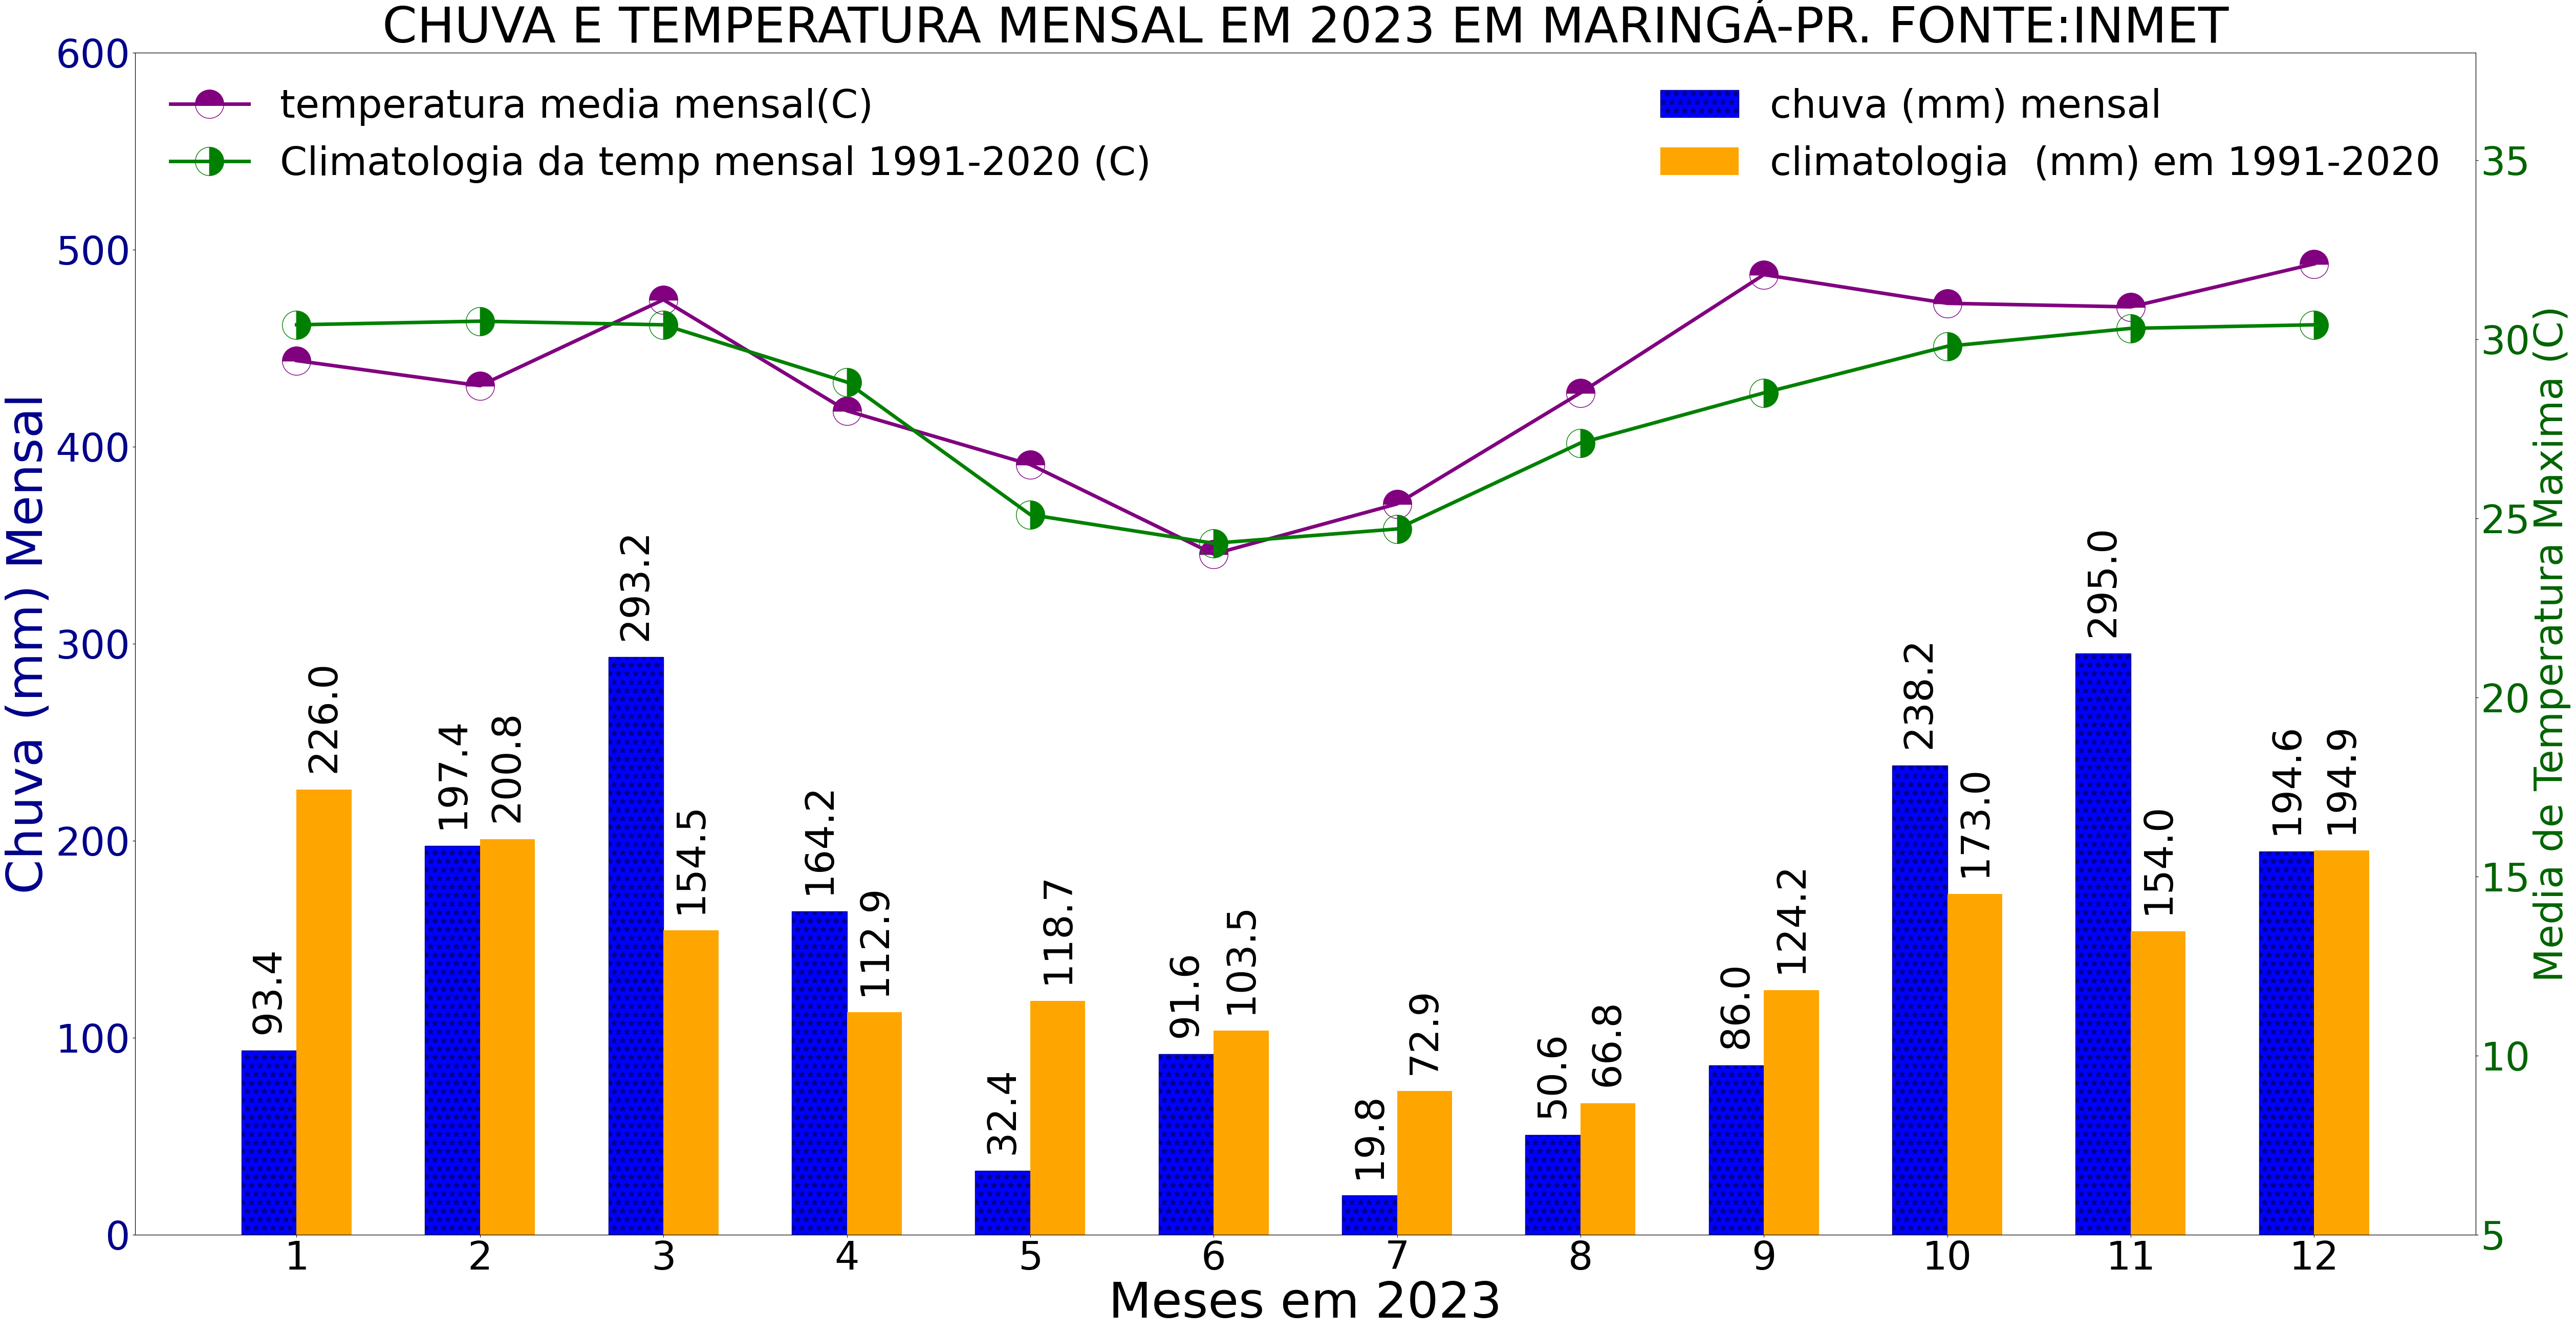

In [25]:
anoque_eu_quero_analisar = 2024

for contar in range(1):
    anoque_eu_quero_analisar -= 1
    print(anoque_eu_quero_analisar)

    dados_ano_chuva = pd.DataFrame(Dados_chuva2.loc[(Dados_chuva2["Ano_tabela"] == anoque_eu_quero_analisar)])
    dados_ano_chuva.style.highlight_max()
    dados_ano_chuva['media climatologica mensal (mm)'] = [226, 200.8 , 154.5, 112.9, 118.7, 103.5, 72.9, 66.8, 124.2, 173, 154, 194.9 ] #1991 - 2020
    display(dados_ano_chuva)
    
   # di.export(dados_ano_chuva, f'interpoladoschuva{anoque_eu_quero_analisar}.jpg',max_rows=12, max_cols=4)
    
    
    dados_ano_temp = pd.DataFrame(temp_max2_round.loc[(Dados_chuva2["Ano_tabela"] == anoque_eu_quero_analisar)])
    dados_ano_temp.style.highlight_max()
    dados_ano_temp["Climatologia da temperatura maxima (C)"]= [ 30.4, 30.5, 30.4, 28.8, 25.1, 24.3, 24.7, 27.1, 28.5, 29.8, 30.3, 30.4 ]
    display(dados_ano_temp)
 #   di.export(dados_ano_temp, f'interpoladostemp{anoque_eu_quero_analisar}.jpg',max_rows=12, max_cols=4)
    
    
    
    

    plt.rcParams.update({'font.size':55})


    import pandas as pd

    a =  dados_ano_chuva['Prec (mm)']
    #x =  mesSaoCarlos2['Local', 'Local']
    z = dados_ano_chuva['media climatologica mensal (mm)'] 
    w =  dados_ano_chuva['Mes_tabela']


    largura = 0.3
    #matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
    #https://www.twblogs.net/a/5f051dc0d01354d745cf4aec


    def autolabel(grupos):
         for i in grupos:
            h= i.get_height()
            ax.annotate('{}'.format(h), 
            xy =(i.get_x()+i.get_width()/2,h),
            xytext = (0,35),
                rotation=90,
            textcoords = 'offset points',
             ha = 'center')
            
    #temperaturas
    y1 = dados_ano_temp["Tmax (°C)"]
    y2= dados_ano_temp["Climatologia da temperatura maxima (C)"]
            
    #grafico    
    fig,ax =plt.subplots(figsize=(59,30))
    #fig,ax2 =plt.subplots(figsize=(59,30))


    #fig,ax=plt.subplots()
    
    grupo1 =ax.bar(w - largura/2 , round(a,1), largura, color ='blue', edgecolor = 'darkblue', hatch = '*', label ='chuva (mm) mensal')
    grupo2 =ax.bar(w + largura/2 , z , largura, color ='orange', label ='climatologia  (mm) em 1991-2020')


    #https://www.youtube.com/watch?v=fD0MPHGCLMo




    color2 = 'darkgreen'

    ax2 = ax.twinx() # compartilhar o mesmo eixo x
    ax2.set_ylabel('Media de Temperatura Maxima (C)',color = color2) 

    #ax2.plot(df['tipo defeito'], df['cum (%)'],color = color2,marker = 's',markersize = 8, linestyle = '-')

    #grupo3 = ax2.plot(w,y1, c='purple', ls='-', lw ='5', marker='o', ms='40',fillstyle='top',label = 'temperatura media mensal(C)')
    #grupo4 = ax2.plot(w,y2, c='green', ls='-', lw ='5', marker='o', ms='40',fillstyle='right',label = 'Climatologia da temp mensal 1981-2010 (C)')
    ax2.plot(w,y1, c='purple', label = 'temperatura media mensal(C)', ls='-', lw ='5', marker='o', ms='40',fillstyle='top')
    ax2.plot(w,y2, c='green', ls='-', lw ='5', marker='o', ms='40',fillstyle='right',label = 'Climatologia da temp mensal 1991-2020 (C)')

    #ax.plot( c='purple', ls='-', lw ='5', marker='o', ms='40',fillstyle='top',label = 'temperatura media mensal(C)')
    #ax.plot( c='green', ls='-', lw ='5', marker='o', ms='40',fillstyle='right',label = 'Climatologia da temp mensal 1981-2010 (C)')


    ax2.tick_params(axis = 'y',labelcolor = color2)
    ax2.set_ylim([5,38])

    color3 = 'darkblue'
    ax.set_title('CHUVA E TEMPERATURA MENSAL EM {} EM {}. FONTE:INMET'.format(anoque_eu_quero_analisar,cidade_analise) , fontsize = 70)
    ax.set_ylabel('Chuva (mm) Mensal', fontsize = 70, color = color3)
    ax.set_xlabel('Meses em {}'.format(anoque_eu_quero_analisar), fontsize = 70)

    ax.tick_params(axis = 'y',labelcolor = color3)

    for tick in ax.get_xticklabels():
    #tick.set_rotation(45)

        tick.set_rotation(0)
    #ax2.set_ylabel(w,color = color2) 

    ax.legend()
    ax.set_ylim([0,600])
    #plt.axhline(100.0, 0, 1, linewidth=7, color ='r')

    plt.xticks(rotation=0)

    #plt.xticks(rotation=70)
    ax.set_xticks(w)
    #ax.set_xticklabels(x)
    ax.set_xticklabels(w)


    autolabel(grupo1)
    autolabel(grupo2)
    #autolabel(grupo3)
    #autolabel2(grupo4)

    #plt.savefig('graficocapitais.png',dpi =600)
    ax.legend(frameon = False)
    ax2.legend(loc = 2,frameon = False)
    #loc eh a posicao do matplotlib 
    #https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.legend.html

    #para salvar trava
    #plt.savefig(f'Grafico_Completo/Graficoteste{anoque_eu_quero_analisar}.png',format='png',dpi = 600, bbox_inches = 'tight')

    #plt.savefig('graficocapitais.png',dpi =600)

    plt.show()

#https://www.youtube.com/watch?v=NJyX0qVsODc
#https://www.youtube.com/watch?v=05UHgEZatvU
#https://www.youtube.com/watch?v=wg_xsuMffns
#https://www.youtube.com/watch?v=3c206LU87Tc
#https://www.youtube.com/watch?v=dc_8DD6btFU


#pareto
#https://www.youtube.com/watch?v=yvRhPKOnYz4
#https://www.youtube.com/watch?v=wg_xsuMffns